In this project, it is a study/analysis of the actions of the Brazilian company 
Magazina Luiza in the financial market throughout the period of 2021

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
Data = pd.read_excel('Vase_004 - Magalu - Sem Resolução.xlsx')
Data.head()

,Data,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
0,2021-01-04,25.580000,24.870001,25.260000,25.200001,25706100,25.181740
1,2021-01-05,25.180000,24.340000,25.100000,24.760000,25431900,24.742058
2,2021-01-06,24.660000,23.420000,24.650000,23.459999,51799000,23.442999
3,2021-01-07,23.850000,22.950001,23.639999,23.160000,42146600,23.143217
4,2021-01-08,24.299999,23.020000,23.190001,23.840000,43988100,23.822723


In [20]:
Data.shape

(247, 7)

In [21]:
Data.columns

Index(['Data', 'Maior', 'Menor', 'Abertura', 'Fechamento', 'Volume',
       'Adj Close'],
      dtype='object')

In [22]:
Project = Data.rename(columns = {'Data': 'Open date', 'Maior': 'Greater negociation', 'Menor': 'Lower negotiation', 
                          'Abertura': 'First negociation', 'Fechamento': 'Closing negociation','Volume': 'Negociation volume',
                         'Adj Close': 'Closing adjustment'})


Project.head().set_index('Open date')

,Greater negociation,Lower negotiation,First negociation,Closing negociation,Negociation volume,Closing adjustment
Open date,,,,,,
2021-01-04,25.580000,24.870001,25.260000,25.200001,25706100,25.181740
2021-01-05,25.180000,24.340000,25.100000,24.760000,25431900,24.742058
2021-01-06,24.660000,23.420000,24.650000,23.459999,51799000,23.442999
2021-01-07,23.850000,22.950001,23.639999,23.160000,42146600,23.143217
2021-01-08,24.299999,23.020000,23.190001,23.840000,43988100,23.822723


In [23]:
Project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Open date            247 non-null    datetime64[ns]
 1   Greater negociation  247 non-null    float64       
 2   Lower negotiation    247 non-null    float64       
 3   First negociation    247 non-null    float64       
 4   Closing negociation  247 non-null    float64       
 5   Negociation volume   247 non-null    int64         
 6   Closing adjustment   247 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.6 KB


In [24]:
Statistics_Project = Project.describe()
Statistics_Project

,Greater negociation,Lower negotiation,First negociation,Closing negociation,Negociation volume,Closing adjustment
count,247.000000,247.000000,247.000000,247.000000,2.470000e+02,247.000000
mean,18.977530,18.205668,18.629717,18.549555,4.536056e+07,18.541389
std,5.632712,5.567061,5.602659,5.637050,4.082594e+07,5.631316
min,6.200000,5.620000,5.710000,5.740000,8.716100e+06,5.740000
25%,15.010000,14.275000,14.705000,14.555000,2.285200e+07,14.555000
50%,20.650000,19.930000,20.280001,20.270000,3.130900e+07,20.255312
75%,22.595000,21.985001,22.375000,22.200001,4.742785e+07,22.183912
max,27.070000,25.900000,26.250000,26.240000,2.578313e+08,26.220984


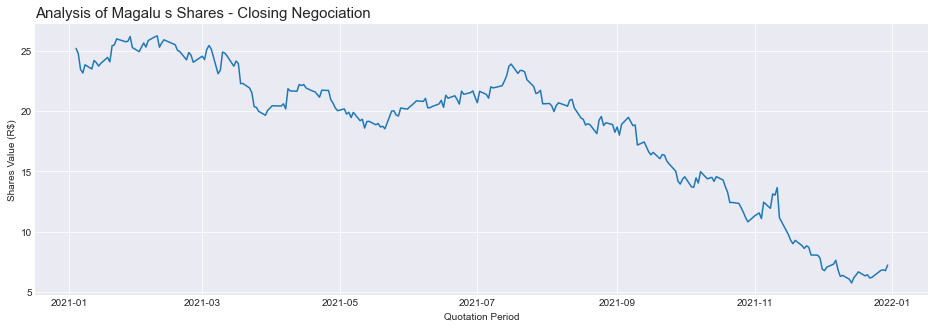

In [25]:
plt.style.use('seaborn-darkgrid')
plt.figure( figsize=(16, 5) )
plt.title('Analysis of Magalu s Shares - Closing Negociation', fontsize=15, loc='left')
plt.plot( Project['Open date'], Project['Closing negociation'] )


plt.xlabel('Quotation Period')
plt.ylabel('Shares Value (R$)');

In [26]:
Project.tail().set_index('Open date')

,Greater negociation,Lower negotiation,First negociation,Closing negociation,Negociation volume,Closing adjustment
Open date,,,,,,
2021-12-23,6.34,5.99,6.22,6.20,97106100,6.20
2021-12-27,6.78,6.23,6.23,6.78,124279800,6.78
2021-12-28,6.96,6.64,6.79,6.83,165573900,6.83
2021-12-29,6.90,6.70,6.84,6.76,79247400,6.76
2021-12-30,7.41,6.77,6.80,7.22,180329400,7.22


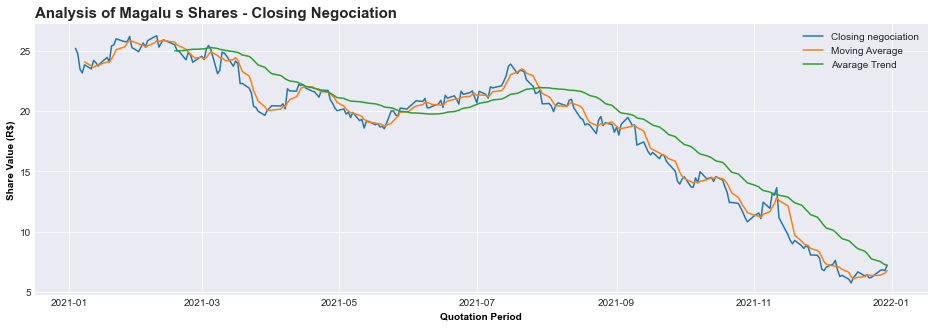

In [27]:
Moving_average = Project['Closing negociation'].rolling(5).mean()
Average_trend = Project['Closing negociation'].rolling(30).mean()

plt.style.use('seaborn-darkgrid')
plt.figure( figsize=(16, 5) )
plt.title('Analysis of Magalu s Shares - Closing Negociation', fontsize=15, loc='left', fontweight=600)

plt.plot( Project['Open date'], Project['Closing negociation'],  label='Closing negociation' )
plt.plot( Project['Open date'], Moving_average, label='Moving Average' )
plt.plot( Project['Open date'], Average_trend, label='Avarage Trend' )

plt.legend()

plt.xlabel('Quotation Period', fontweight=600, color='black')
plt.ylabel('Share Value (R$)', fontweight=600, color='black');

I took the moving average of 5 to 5 values and the trending average of 30 to 30 values, 
but even so, the graph ended up showing the fall in the value of Magazine Luiza shares

In [28]:
Project['Month'] = Project['Open date'].dt.month

Project.head()

,Open date,Greater negociation,Lower negotiation,First negociation,Closing negociation,Negociation volume,Closing adjustment,Month
0,2021-01-04,25.580000,24.870001,25.260000,25.200001,25706100,25.181740,1
1,2021-01-05,25.180000,24.340000,25.100000,24.760000,25431900,24.742058,1
2,2021-01-06,24.660000,23.420000,24.650000,23.459999,51799000,23.442999,1
3,2021-01-07,23.850000,22.950001,23.639999,23.160000,42146600,23.143217,1
4,2021-01-08,24.299999,23.020000,23.190001,23.840000,43988100,23.822723,1


After creating the month column, let's analyze the monthly closing negociations value of Magazine Luiza

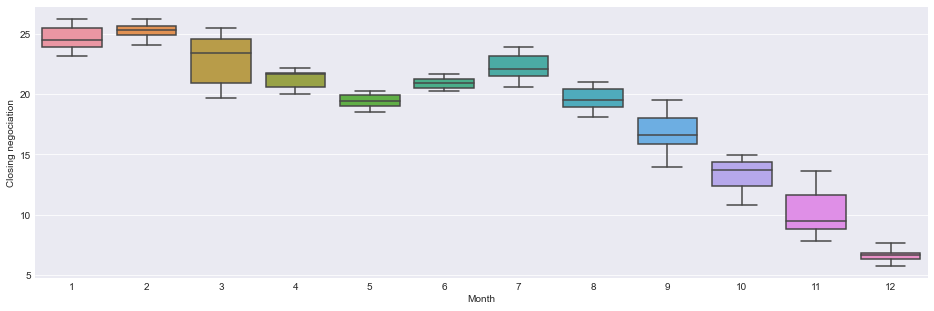

In [29]:
plt.figure( figsize=(16, 5) )
sns.boxplot( data=Project, x='Month', y='Closing negociation' );

It is noticed that the months of March, September and November, there was a great 
fluctuation in the value of Magazine Luiza shares

In [30]:
Project.groupby(['Month']).describe()['Closing negociation']

,count,mean,std,min,25%,50%,75%,max
Month,,,,,,,,
1,19.0,24.644737,0.960280,23.160000,23.900000,24.450001,25.455000,26.190001
2,18.0,25.208889,0.656021,24.049999,24.877501,25.299999,25.650000,26.240000
3,23.0,22.855217,1.976698,19.650000,20.940001,23.389999,24.559999,25.440001
4,20.0,21.249000,0.735297,20.030001,20.560000,21.625000,21.760000,22.200001
5,21.0,19.430476,0.564973,18.530001,18.969999,19.459999,19.900000,20.250000
6,21.0,20.898095,0.463116,20.270000,20.500000,20.889999,21.270000,21.670000
7,21.0,22.232857,0.977574,20.600000,21.530001,22.040001,23.120001,23.900000
8,22.0,19.656818,0.885827,18.129999,18.897500,19.485000,20.452499,20.969999
9,21.0,16.746191,1.628581,13.940000,15.870000,16.570000,18.010000,19.480000


The monthly statistics of the closing negociations values

In [31]:
import plotly.graph_objects as go

In [32]:
Candlestick_chart = go.Figure(data=[go.Candlestick(x= Project.index, 
                                                   open = Project['First negociation'], 
                                                   high = Project['Greater negociation'], 
                                                   low = Project['Lower negotiation'], 
                                                   close = Project['Closing negociation'])])

Candlestick_chart.show()

The logic is as follows: if you invest in a few stocks and the stock market goes down, 
your entire portfolio will go down. In this case, investing in Magazine Luiza shares 
would not be a good idea at the moment.